In [1]:
import pandas as pd
import nltk
# nltk.download()
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
# Import Data
data = pd.read_csv('Videos_data.csv')


In [3]:
data.head(10)

,Unnamed: 0,Video Id,Title,Description,Category
0,0,ehmsJLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,1,e2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,2,i9E_Blai8vk,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,3,#NAME?,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,4,7ByoBJYXU0k,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel
5,5,yvn79Rv0F48,Backpacking In Meghalaya | NorthEast India Tri...,"In this video I explored North East India, sta...",travel
6,6,SL_YBLWdZb8,Welcome to Peru! | Best Essential Tips &amp; T...,Welcome to Peru! This essential travel guide w...,travel
7,7,kiNyRY5s7n8,How to Start a Travel Blog [2019] Travel Blogg...,Create a Travel Blog Website for Just $3.95 + ...,travel
8,8,kY41XgTEEQU,A Day with KSRTC Bus Fans - Aanavandi Travel B...,ആനവണ്ടി ഭ്രാന്തൻമാരോടൊപ്പം കുമളിയിൽ ഒരു ദിവസം ...,travel
9,9,7mIzRYh8jGA,What is it like to travel in PAKISTAN?,Subscribe now: https://goo.gl/6zXZGK Watch the...,travel


In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
data.isnull().sum()

Video Id         0
Title            0
Description    334
Category         0
dtype: int64

In [6]:
null_data = data[data['Description'].isnull()]


In [7]:
for i in null_data['Title']:
    dup_data = data[data['Title'] == i ]
    print(dup_data)
    

       Video Id                   Title Description Category
60  DQIuu5qDCyo  ROXAS CITY TRAVEL BLOG         NaN   travel
        Video Id                                      Title Description  \
209  v3v3mPlbJy0  Travel blog: Working some jobs in Rotorua         NaN   
341  v3v3mPlbJy0  Travel blog: Working some jobs in Rotorua         NaN   

    Category  
209   travel  
341   travel  
        Video Id                                     Title Description  \
213  qdLl1rVW6GE  Hạ Long 2019/Nghỉ lễ đi đâu?/Travel Blog         NaN   

    Category  
213   travel  
        Video Id                                        Title Description  \
337  1c7_140xDqQ  Travel blog: Malaysia to Singapore and back         NaN   
421  1c7_140xDqQ  Travel blog: Malaysia to Singapore and back         NaN   

    Category  
337   travel  
421   travel  
        Video Id                                      Title Description  \
209  v3v3mPlbJy0  Travel blog: Working some jobs in Rotorua         NaN   
3

         Video Id                                              Title  \
2309  yqQs_Zl6hOc  Modern Farming Technology Latest Harvesting Ma...   

     Description                Category  
2309         NaN  science and technology  
         Video Id                                              Title  \
2326  IYJ22b4zNZ4  Science and Technology 6 Months Current Affair...   

     Description                Category  
2326         NaN  science and technology  
         Video Id                                              Title  \
2345  5d9RU1WgsBI  PT 365 SCIENCE AND TECHNOLOGY 2019 PART 6 VISI...   

     Description                Category  
2345         NaN  science and technology  
         Video Id                                              Title  \
2359  cbq6ZgHoSMY  PT 365 SCIENCE AND TECHNOLOGY 2019 PART 7 VISI...   

     Description                Category  
2359         NaN  science and technology  
         Video Id                                              Title  \
2379

         Video Id                                              Title  \
4412  ovB9Ttaj1Pg  Improved Nature® PrimeProTex® Tenders   Cookin...   
4424  ovB9Ttaj1Pg  Improved Nature® PrimeProTex® Tenders   Cookin...   

     Description Category  
4412         NaN     food  
4424         NaN     food  
         Video Id                                              Title  \
4412  ovB9Ttaj1Pg  Improved Nature® PrimeProTex® Tenders   Cookin...   
4424  ovB9Ttaj1Pg  Improved Nature® PrimeProTex® Tenders   Cookin...   

     Description Category  
4412         NaN     food  
4424         NaN     food  
         Video Id                           Title Description Category
4435  qMt3nYoCXq4  Cooking Matters in Arkansas HD         NaN     food
         Video Id                                          Title Description  \
4483  kVhOLkIs20A  Keynote address from Tim Cook, CEO, Apple Inc         NaN   

     Category  
4483     food  
         Video Id                                              

         Video Id                                              Title  \
5673  cFwgFjgukh0  Indiana Chamber Foundation Manufacturing Pathw...   
6316  cFwgFjgukh0  Indiana Chamber Foundation Manufacturing Pathw...   

     Description       Category  
5673         NaN  manufacturing  
6316         NaN  manufacturing  
         Video Id                          Title Description       Category
5688  s2OWCpfuA2U  N0505B  Manufacturing Account         NaN  manufacturing
6331  s2OWCpfuA2U  N0505B  Manufacturing Account         NaN  manufacturing
         Video Id                             Title Description       Category
5704  Fomi0V_xl4k  Five Axis Additive Manufacturing         NaN  manufacturing
6347  Fomi0V_xl4k  Five Axis Additive Manufacturing         NaN  manufacturing
         Video Id                                 Title Description  \
5710  0A6gzBTmK08  Tablet Manufacturing Process Part A.         NaN   
6353  0A6gzBTmK08  Tablet Manufacturing Process Part A.         NaN   

  

         Video Id                                              Title  \
7957  iwkxu7JxM14  Conversation With Professor Asmarom Legesse , ...   

     Description Category  
7957         NaN  history  
         Video Id                    Title Description Category
7962  3BvxcFe1Jgk  Anthropology homework 3         NaN  history
         Video Id                            Title Description Category
7963  l7KsjyxGRVA  Anthropology Video Presentation         NaN  history
         Video Id                   Title Description Category
7964  38fqUJZ7P9c  ANTHROPOLOGY-[version]         NaN  history
         Video Id                                              Title  \
7965  t6GFd2SYxzY  UPSC 2018 Topper I Anthropology Preparation St...   

     Description Category  
7965         NaN  history  
         Video Id                       Title Description Category
7967  qzhmu-yqSR0  entrevista anthropology :v         NaN  history
         Video Id                                              Tit

In [8]:
print(data.shape)
data = data.dropna(how='any')
print(data.shape)

(10333, 4)
(9999, 4)


In [9]:
data['Category'].value_counts()

food                      1695
manufacturing             1673
art and music             1672
travel                    1671
science and technology    1656
history                   1632
Name: Category, dtype: int64

In [10]:
#### You can download the stopwords and wordnet by uncommenting

# nltk.download('stopwords')
# nltk.download('wordnet')

In [11]:
stop_words = set(stopwords.words('english'))
##Creating a list of custom stopwords
new_words = ["fig","figure","image","sample","using", 
             "show", "result", "large", 
             "also", "one", "two", "three", 
             "four", "five", "seven","eight","nine"]
stop_words = list(stop_words.union(new_words))

In [12]:
# cleaning the data
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    # remove stopwords
    text = [word for word in text if word not in stop_words]

    # remove words less than three letters
    text = [word for word in text if len(word) >= 3]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word, "v") for word in text]
    
    return ' '.join(text)

In [13]:
# The frac keyword argument specifies the fraction of rows to return in the random sample
# specifying drop=True prevents .reset_index from creating a column containing the old index entries.
data = data.sample(frac=1).reset_index(drop=True)
docs = pd.DataFrame()
docs['Title'] = data['Title'].iloc[:5000].apply(lambda x:pre_process(x))
docs['Description'] = data['Description'].iloc[:5000].apply(lambda x:pre_process(x))

In [14]:
docs.head()

,Title,Description
0,fast food salad taste test,see rank favorite fast food salad go eat salad...
1,travel,copyright holders please note reference purpos...
2,travel next life update,next video give little update travel next coun...
3,science technology germany metallurgical engineer,science technology germany metallurgical engin...
4,first print supercar new way build cars,conventional cars wasteful way build way opera...


In [15]:
# Label encoding the classes

docs['classes'] = data['Category']
docs['classes'].value_counts()

science and technology    868
art and music             856
food                      840
manufacturing             828
travel                    810
history                   798
Name: classes, dtype: int64

In [16]:
# Encoding classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(docs['classes'])
docs['classes'] = le.transform(docs['classes'])
docs.head()

,Title,Description,classes
0,fast food salad taste test,see rank favorite fast food salad go eat salad...,1
1,travel,copyright holders please note reference purpos...,5
2,travel next life update,next video give little update travel next coun...,5
3,science technology germany metallurgical engineer,science technology germany metallurgical engin...,4
4,first print supercar new way build cars,conventional cars wasteful way build way opera...,3


In [17]:
le.classes_
# art and music -> 0, food -> 1, and so on.

array(['art and music', 'food', 'history', 'manufacturing',
       'science and technology', 'travel'], dtype=object)

In [18]:
docs['classes'].value_counts()

4    868
0    856
1    840
3    828
5    810
2    798
Name: classes, dtype: int64

In [19]:
# Vectorizing text features using TF-IDF


tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = docs['classes']
features_title = tfidf_title.fit_transform(docs['Title']).toarray()
features_description = tfidf_desc.fit_transform(docs['Description']).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (5000, 1292)
Description Features Shape: (5000, 2677)


In [20]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = docs['Title'].values
descriptions = docs['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(docs['classes']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 16167 unique tokens.
Shape of data tensor: (5000, 50)
Shape of label tensor: (5000, 6)


In [21]:
titles[0:4]

array(['fast food salad taste test', 'travel', 'travel next life update',
       'science technology germany metallurgical engineer'], dtype=object)

In [22]:
data_for_lstms[0:4]

['fast food salad taste test see rank favorite fast food salad go eat salad better best taste salad find drive thru',
 'travel copyright holders please note reference purpose available buy discogs follow',
 'travel next life update next video give little update travel next countries subscribe',
 'science technology germany metallurgical engineer science technology germany metallurgical engineer germany achievements science technology significant research']

In [23]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 1,081,006
Trainable params: 1,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Training LSTM Model
epochs = 10
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 6s 246ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.1629 - val_accuracy: 0.9707
Epoch 2/10
24/24 [==============================] - 6s 242ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.1614 - val_accuracy: 0.9720
Epoch 3/10
24/24 [==============================] - 6s 241ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.1715 - val_accuracy: 0.9707
Epoch 4/10
24/24 [==============================] - 6s 242ms/step - loss: 0.0028 - accuracy: 0.9987 - val_loss: 0.1930 - val_accuracy: 0.9680
Epoch 5/10
24/24 [==============================] - 6s 240ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.1905 - val_accuracy: 0.9733
Epoch 6/10
24/24 [==============================] - 6s 246ms/step - loss: 0.0027 - accuracy: 0.9987 - val_loss: 0.1925 - val_accuracy: 0.9680
Epoch 7/10
24/24 [==============================] - 6s 244ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.1942 - val_accuracy: 0.9667
Epoch 

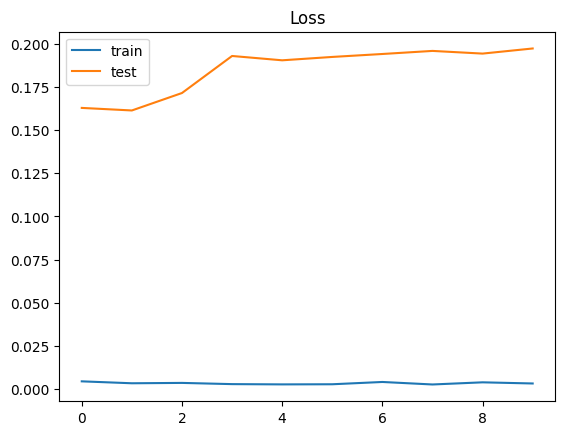

In [38]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

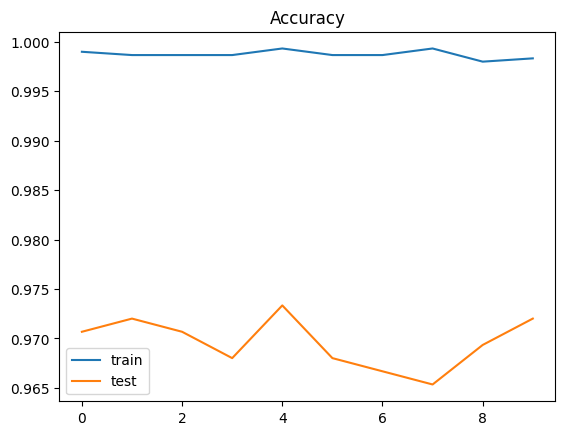

In [39]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [40]:
# Saving the tokenizer and the model:

import pickle

pickle.dump(tokenizer, open('video_classification-tokenizer.pkl', 'wb'))
model.save('video_classification-model.h5')